# Lab | Customer analysis round 3

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%run functions.py

In [2]:
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv'

df = pd.read_csv(url)

df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [3]:
# Removing 'Unnamed: 0' column

df = df.drop('Unnamed: 0', axis=1)

df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
# Checking for nulls and duplicates

print('Number of null values by column:\n', df.isna().sum(), '\n')

print('Number of duplicates:', df.duplicated().sum())

Number of null values by column:
 Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64 

N

In [5]:
# Applying master cleaning function to the dataframe

df = clean_dataframe(df)

df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [6]:
# Checking again for nulls and duplicates

print('Number of null values by column:\n', df.isna().sum(), '\n')

print('Number of duplicates:', df.duplicated().sum())

Number of null values by column:
 customer                            0
state                             614
customer_lifetime_value             0
response                          614
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           623
months_since_policy_inception       0
number_of_open_complaints         623
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     608
vehicle_size                      608
vehicle_type                     5465
dtype: int64 

N

In [7]:
nullcols = ['state', 'response', 'months_since_last_claim', 'number_of_open_complaints', 'vehicle_class', 'vehicle_size', 'vehicle_type']

nulls1 = df[nullcols][df['months_since_last_claim'].isna()]
nulls1.head()

,state,response,months_since_last_claim,number_of_open_complaints,vehicle_class,vehicle_size,vehicle_type
4,Oregon,No,NaN,NaN,Four-Door Car,Medsize,NaN
23,California,No,NaN,NaN,Four-Door Car,Medsize,NaN
51,Arizona,No,NaN,NaN,Four-Door Car,Large,A
59,Arizona,No,NaN,NaN,Four-Door Car,Medsize,NaN
67,Washington,Yes,NaN,NaN,Two-Door Car,Medsize,A


In [8]:
nulls2 = df[nullcols][df['state'].isna()]
nulls2.head()

,state,response,months_since_last_claim,number_of_open_complaints,vehicle_class,vehicle_size,vehicle_type
5,NaN,NaN,2.0,0.0,Four-Door Car,Medsize,A
11,NaN,NaN,5.0,0.0,Two-Door Car,Medsize,NaN
58,NaN,NaN,10.0,0.0,Two-Door Car,Small,NaN
62,NaN,NaN,8.0,0.0,Two-Door Car,Medsize,NaN
126,NaN,NaN,0.0,1.0,Four-Door Car,Medsize,A


In [9]:
nulls3 = df[nullcols][df['vehicle_class'].isna()]
nulls3.head()

,state,response,months_since_last_claim,number_of_open_complaints,vehicle_class,vehicle_size,vehicle_type
87,Oregon,No,NaN,NaN,NaN,NaN,NaN
88,Arizona,Yes,NaN,NaN,NaN,NaN,NaN
89,Arizona,No,7.0,0.0,NaN,NaN,A
97,Oregon,No,21.0,0.0,NaN,NaN,A
148,California,No,17.0,1.0,NaN,NaN,A


In [10]:
# Checking summary statistics for numeric columns with null values to decide imputing strategy

df[nullcols].describe()

,months_since_last_claim,number_of_open_complaints
count,10250.000000,10250.000000
mean,15.145073,0.383512
std,10.078893,0.911190
min,0.000000,0.000000
25%,6.000000,0.000000
50%,14.000000,0.000000
75%,23.000000,0.000000
max,35.000000,5.000000


In [11]:
# Filling 'months_since_last_claim' and 'number_of_open_complaints' columns nulls with the median value

median_last_claim = df['months_since_last_claim'].median()
median_open_complaints = df['number_of_open_complaints'].median()

df['months_since_last_claim'] = df['months_since_last_claim'].fillna(median_last_claim)
df['number_of_open_complaints'] = df['number_of_open_complaints'].fillna(median_open_complaints)

df.isna().sum()

customer                            0
state                             614
customer_lifetime_value             0
response                          614
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     608
vehicle_size                      608
vehicle_type                     5465
dtype: int64

In [12]:
# Checking unique value counts for categorical columns with missing values to decide an strategy

cat_cols_nulls = ['state', 'response', 'vehicle_class', 'vehicle_size', 'vehicle_type']

for col in cat_cols_nulls:
    print(df[col].value_counts(), '\n\n')

state
California    3548
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
Name: count, dtype: int64 


response
No     8795
Yes    1464
Name: count, dtype: int64 


vehicle_class
Four-Door Car    5200
Two-Door Car     2112
SUV              2009
Luxury            944
Name: count, dtype: int64 


vehicle_size
Medsize    7233
Small      1962
Large      1070
Name: count, dtype: int64 


vehicle_type
A    5408
Name: count, dtype: int64 




In [13]:
# Filling categorical columns missing values with their respective mode

mode_state = df['state'].mode()[0]
mode_response = df['response'].mode()[0]
mode_vehicle_class = df['vehicle_class'].mode()[0]
mode_vehicle_size = df['vehicle_size'].mode()[0]

df['state'] = df['state'].fillna(mode_state)
df['response'] = df['response'].fillna(mode_response)
df['vehicle_class'] = df['vehicle_class'].fillna(mode_vehicle_class)
df['vehicle_size'] = df['vehicle_size'].fillna(mode_vehicle_size)

df.isna().sum()

customer                            0
state                               0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                       0
vehicle_size                        0
vehicle_type                     5465
dtype: int64

In [14]:
# Removing 'vehicle_type' column

df = df.drop(columns='vehicle_type')
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

In [15]:
# Creating df with > 1000 'total_claim_amount' and 'Yes' in 'response'

df_filter1 = df[(df['total_claim_amount'] > 1000) & (df['response'] == 'Yes')]
df_filter1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
189,OK31456,California,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,51643,...,43,0.0,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.400000,Luxury,Medsize
236,YJ16163,Oregon,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,51643,...,43,0.0,1,Special Auto,Special L3,Offer2,Agent,1358.400000,Luxury,Medsize
419,GW43195,Oregon,25807.063000,Yes,Extended,College,2/13/11,Employed,F,71210,...,89,1.0,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury,Small
442,IP94270,Arizona,13736.132500,Yes,Premium,Master,2/13/11,Disabled,F,16181,...,79,0.0,8,Personal Auto,Personal L2,Offer1,Web,1261.319869,SUV,Medsize
587,FJ28407,California,5619.689084,Yes,Premium,High School or Below,1/26/11,Unemployed,M,0,...,5,0.0,1,Personal Auto,Personal L1,Offer2,Web,1027.000029,SUV,Medsize


2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

In [16]:
df_filter2 = df[df['response'] == 'Yes'].groupby(['policy_type', 'gender'])['total_claim_amount'].agg('mean')
df_filter2 = pd.DataFrame(df_filter2)
df_filter2

total_claim_amount
policy_type    gender                    
Corporate Auto F               433.738499
               M               407.829300
Personal Auto  F               452.755476
               M               457.010178
Special Auto   F               453.280164
               M               429.527942

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

In [17]:
# Total number of customers by state

df_filter_state = df['state'].value_counts()
df_filter_state

state
California    4162
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
Name: count, dtype: int64

In [18]:
# Filtering by states with > 500 customers

mask = df_filter_state > 500

df_filter_state_500 = df_filter_state[mask]
df_filter_state_500

state
California    4162
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
Name: count, dtype: int64

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [19]:
# Grouping by education level and gender, and applying aggregate functions

df_aggregate = df.groupby(['education', 'gender'])['customer_lifetime_value'].agg(['max', 'min', 'median']).round(2)
df_aggregate

max      min   median
education            gender                            
Bachelor             F       73225.96  1904.00  5632.61
                     M       67907.27  1898.01  5548.03
College              F       61850.19  1898.68  5623.61
                     M       61134.68  1918.12  6005.85
Doctor               F       44856.11  2395.57  5332.46
                     M       32677.34  2267.60  5577.67
High School or Below F       55277.45  2144.92  6035.09
                     M       83325.38  1940.98  6286.73
Master               F       51016.07  2417.78  5729.86
                     M       50568.26  2272.31  5579.10

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [20]:
# We need to create a months column from the 'effective_to_date' column

# Converting column to datetime format
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], format='%m/%d/%y')

# Extracting month from that column to create a month col
df['month'] = df['effective_to_date'].dt.strftime('%b')
df['month']

0        Feb
1        Jan
2        Feb
3        Jan
4        Jan
        ... 
10868    Jan
10869    Jan
10870    Feb
10871    Feb
10872    Jan
Name: month, Length: 10873, dtype: object

In [21]:
# Table with months as columns and states as rows

pivot_state_row = df.pivot_table(index='state', columns='month', values='number_of_policies', aggfunc='sum')
pivot_state_row

month,Feb,Jan
state,,
Arizona,2853,3050
California,5875,6631
Nevada,1271,1493
Oregon,3959,4659
Washington,1225,1358


In [22]:
# Policies sold by month and state for the top 3 states

# Getting top 3 states
top3_states = df.groupby('state')['number_of_policies'].sum().sort_values(ascending=False)[:3]

# Creating a list with the top 3 states
list_3_states = top3_states.index.tolist()

# Displaying a dataframe with the number of policies sold each month for the top 3 states
df_top3_states = pd.DataFrame(df[df['state'].isin(list_3_states)].groupby(['state', 'month'])['number_of_policies'].agg('sum'))
df_top3_states

number_of_policies
state      month                    
Arizona    Feb                  2853
           Jan                  3050
California Feb                  5875
           Jan                  6631
Oregon     Feb                  3959
           Jan                  4659

In [23]:
# Analyze the effect of different marketing channels on the customers response rate

df_channel_response = pd.DataFrame(df.groupby(['sales_channel', 'response'])['customer'].count())
df_channel_response

customer
sales_channel response          
Agent         No            3370
              Yes            741
Branch        No            2688
              Yes            325
Call Center   No            1911
              Yes            221
Web           No            1440
              Yes            177

## EDA (Exploratory Data Analysis) 

Complete the following tasks to explore the data:
- Show DataFrame info.
- Describe DataFrame.
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.

In [24]:
# Showing dataframe info

df.info

<bound method DataFrame.info of       customer       state  customer_lifetime_value response  coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10868  FE99816      Nevada             15563.369440       No   Premium   
10869  KX53892      Oregon              5259.444853       No     Basic   
10870  TL39050     Arizona             23893.304100       No  Extended   
10871  WA60547  California             11971.977650       No   Premium   
10872  IV32877  California              6857.519928       No     Basic   

      education effective_to_date employmentstatus gender  income  ...  \
0    

In [25]:
# Showing dataframe summary statistics

df.describe()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10873.000000,10873,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000,10873.000000
mean,8016.881720,2011-01-29 22:43:58.830129664,37537.101444,93.216684,15.079463,48.098777,0.361538,2.977467,434.902879
min,1898.007675,2011-01-01 00:00:00,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,2011-01-16 00:00:00,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.014511
50%,5768.830622,2011-01-30 00:00:00,33811.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.363758
75%,8996.774075,2011-02-14 00:00:00,62262.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,83325.381190,2011-02-28 00:00:00,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678
std,6884.829202,NaN,30362.078350,34.454801,9.789475,27.929932,0.889177,2.397752,292.233402


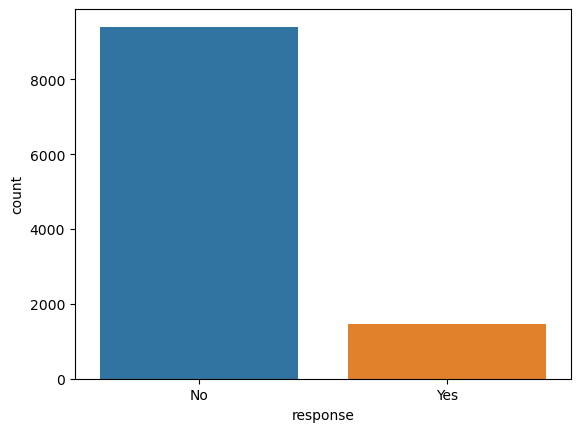

In [26]:
# Plotting responses

import seaborn as sns

fig, ax = plt.subplots()

sns.countplot(data=df, x='response')

plt.show()

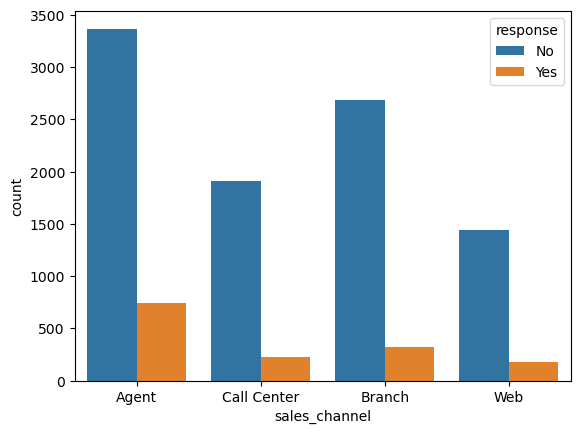

In [27]:
# Plotting response rate by sales channel

fig, ax = plt.subplots()

sns.countplot(data=df, x='sales_channel', hue='response')

plt.show()

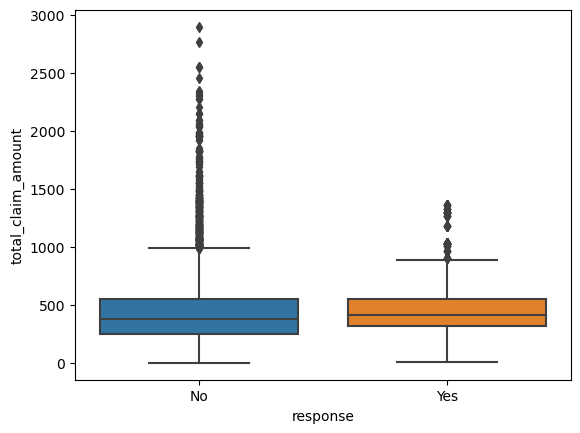

In [28]:
# Plotting response rate by total claim amount - boxplot

fig, ax = plt.subplots()

sns.boxplot(data=df, x='response', y='total_claim_amount')

plt.show()

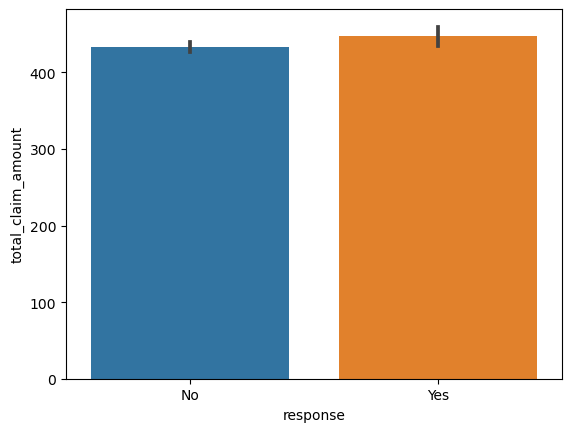

In [29]:
# Plotting response rate by total claim amount - barplot

fig, ax = plt.subplots()

sns.barplot(data=df, x='response', y='total_claim_amount')

plt.show()

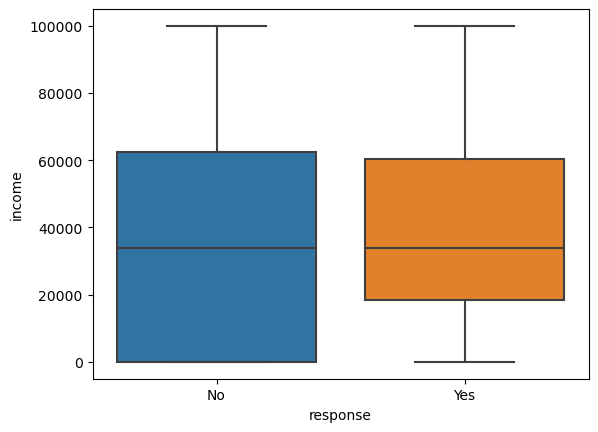

In [30]:
# Plotting response rate by income - boxplot

fig, ax = plt.subplots()

sns.boxplot(data=df, x='response', y='income')

plt.show()

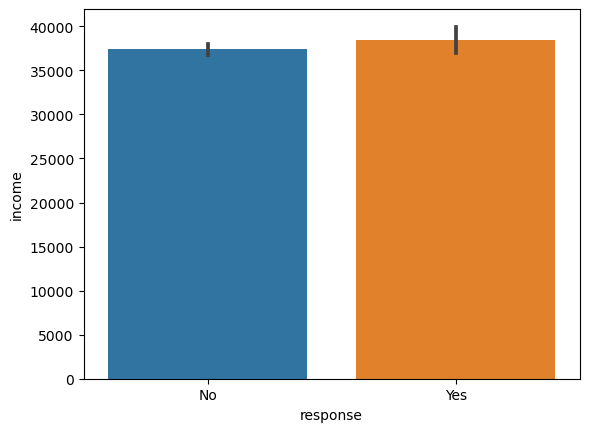

In [31]:
# Plotting response rate by income - barplot

fig, ax = plt.subplots()

sns.barplot(data=df, x='response', y='income')

plt.show()